In [1]:
!apt-get update
!apt-get install -y cmake build-essential pkg-config

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

!mkdir -p opencv/build
%cd opencv/build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
        -D CMAKE_INSTALL_PREFIX=/usr/local \
        -D OPENCV_ENABLE_NONFREE=ON \
        -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
        -D BUILD_EXAMPLES=OFF ..
!make -j8
!make install


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,032 kB]
G

**Instructions:**
Complete the following tasks using OpenCV and relevant libraries in Python (e.g., OpenCV, scikit-image).
Each task should be implemented in a separate code block. Submit your Python script or notebook with
all cells executed, outputs displayed, and brief explanations describing your approach, observations, and
results.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Task 1: SIFT Feature Extraction


**SIFT Feature Extraction**
SIFT (Scale-Invariant Feature Transform) detects important points, called keypoints, in an image. These
keypoints represent distinct and unique features, such as corners or edges, that can be identified even if
the image is resized, rotated, or transformed. SIFT generates a descriptor for each keypoint, which helps
in matching these points across images.
The code first loads the image, converts it to grayscale (because many feature detectors work better on
grayscale images), and then uses the SIFT algorithm to detect keypoints. The keypoints are visualized on
the image

**Key Points:**
* Keypoints are important image features.
* Descriptors are used to describe and match these keypoints

1. Load an image of your choice.


In [3]:
IMAGE1_PATH = '/content/image1.jpg'
IMAGE2_PATH = '/content/image2.jpg'

In [4]:
image = cv2.imread(IMAGE1_PATH)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

2. Use the SIFT (Scale-Invariant Feature Transform) algorithm to detect and compute keypoints and
descriptors in the image.


In [5]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image,keypoints,None)

3. Visualize the keypoints on the image and display the result.

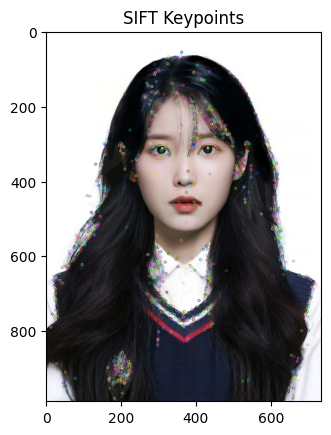

In [6]:
plt.imshow(cv2.cvtColor(image_with_keypoints,cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints')
plt.show()

# Task 2: SURF Feature Extraction

**SURF Feature Extraction**
SURF (Speeded-Up Robust Features) is similar to SIFT but is optimized for speed. SURF focuses on finding
features faster, making it useful for real-time applications. It also detects keypoints and generates
descriptors but uses a different mathematical approach to SIFT.
In the code, SURF is used to detect keypoints in a grayscale image, and the keypoints are visualized
similarly to SIFT. The performance of SURF is usually faster than SIFT, but it might miss certain keypoints
that SIFT would detect.

**Key Points:**
* SURF is faster than SIFT.
* It can be a good choice for real-time applications.

1. Load a different image (or the same one)


In [7]:
image = cv2.imread(IMAGE1_PATH)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


2. Apply the SURF (Speeded-Up Robust Features) algorithm to detect and compute keypoints and
descriptors


In [8]:
surf = cv2.xfeatures2d.SURF_create()
keypoints, descriptors = surf.detectAndCompute(gray_image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)


3. Visualize the keypoints on the image and display the result.

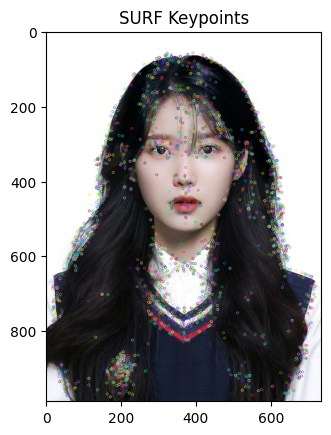

In [9]:
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints')
plt.show()

# Task 3: ORB Feature Extraction

**ORB Feature Extraction**
ORB (Oriented FAST and Rotated BRIEF) is a feature detection algorithm that is both fast and
computationally less expensive than SIFT and SURF. It is ideal for real-time applications, particularly in
mobile devices. ORB combines two methods: FAST (Features from Accelerated Segment Test) to detect
keypoints and BRIEF (Binary Robust Independent Elementary Features) to compute descriptors.
The code uses ORB to detect keypoints and display them on the image. Unlike SIFT and SURF, ORB is more
focused on speed and efficiency, which makes it suitable for applications that need to process images
quickly.

**Key Points:**
* ORB is a fast alternative to SIFT and SURF.
* It’s suitable for real-time and resource-constrained environments

1. Apply the ORB (Oriented FAST and Rotated BRIEF) algorithm to detect keypoints and compute
descriptors on another image

In [10]:
image = cv2.imread(IMAGE1_PATH)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

keypoints,descriptors = orb.detectAndCompute(gray_image,None)

image_with_keypoints = cv2.drawKeypoints(image,keypoints,None)

2. Visualize and display the keypoints.

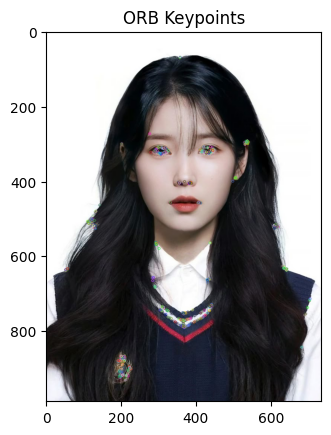

In [11]:
plt.imshow(cv2.cvtColor(image_with_keypoints,cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.show()

# **Task 4: Feature Matching**

**Feature Matching using SIFT**
In this exercise, **feature matching** is used to find similar points between two images. After detecting
keypoints using SIFT, the algorithm uses a **Brute-Force Matcher** to find matching keypoints between two
images. The matcher compares the descriptors of the keypoints and finds pairs that are similar.
In the code, we load two images, detect their keypoints and descriptors using SIFT, and then use the
matcher to draw lines between matching keypoints. The lines show which points in the first image
correspond to points in the second image.

**Key Points:**
* Feature matching helps compare and find similarities between two images.
* The Brute-Force Matcher finds the closest matching descriptors

1. Using the keypoints and descriptors obtained from the previous tasks (e.g., SIFT, SURF, or ORB),
match the features between two different images using Brute-Force Matching or FLANN (Fast
Library for Approximate Nearest Neighbors).

In [12]:
image1 = cv2.imread(IMAGE1_PATH,0)
image2 = cv2.imread(IMAGE2_PATH,0)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1,None)
keypoints2, descriptors2 = sift.detectAndCompute(image2,None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


2. Display the matched keypoints on both images.

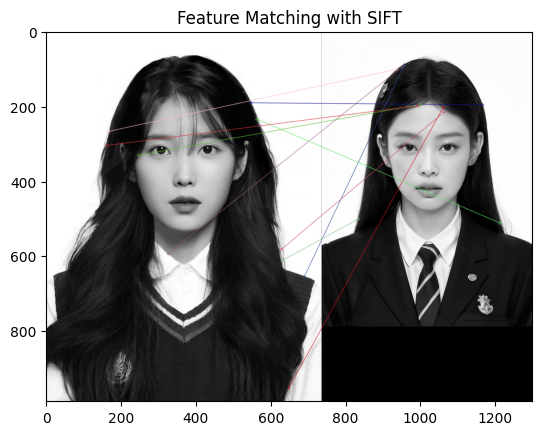

In [13]:
plt.imshow(image_matches)
plt.title('Feature Matching with SIFT')
plt.show()

# **Task5: Application of Feature Matching**

**Real-World Applications (Image Stitching using Homography)**
In this task, you use matched keypoints from two images to align or "stitch" them together. Homography
is a mathematical transformation that maps points from one image to another, which is useful for aligning
images taken from different angles or perspectives. This process is used in image stitching (e.g., creating
panoramas), where you align and merge images to form a larger one.
The code uses the keypoints matched between two images and calculates the homography matrix. This
matrix is then used to warp one image to align it with the other.

**Key Points:**
* Homography is used to align images.
* This is useful in applications like panoramic image creation or object recognition.

In [14]:
image1 = cv2.imread(IMAGE1_PATH)
image2 = cv2.imread(IMAGE2_PATH)

gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1,None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2,None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(descriptors1,descriptors2, k=2)

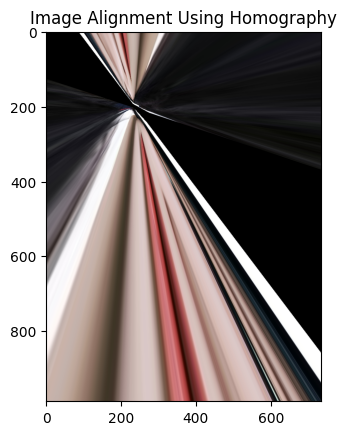

In [15]:
good_matches =[]
for m,n in matches:
  if m.distance < 0.75* n.distance:
    good_matches.append(m)

src_pts = np.float32(
    [keypoints1[m.queryIdx].pt for m in good_matches]
).reshape(-1,1,2)
dst_pts = np.float32(
    [keypoints2[m.trainIdx].pt for m in good_matches]
).reshape(-1,1,2)

M, masl = cv2.findHomography(src_pts,dst_pts, cv2.RANSAC,5.0)

h,w,_ = image1.shape

result = cv2.warpPerspective(image1, M, (w,h))

plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.title("Image Alignment Using Homography")
plt.show()

# Task 6: Combining Feature Extraction Methods


Combining SIFT and ORB
By combining two feature extraction methods (SIFT and ORB), you can take advantage of the strengths of
both. For example, SIFT is more accurate, but ORB is faster. By detecting keypoints using both methods,
you can compare how they perform on different types of images and possibly combine their outputs for
more robust feature detection and matching.
In the code, we extract keypoints from two images using both SIFT and ORB, and then you can use a
matcher to compare and match the features detected by both methods.

**Key Points:**
* Combining methods can improve performance in some applications.
* SIFT is accurate, while ORB is fast, making them complementary in certain tasks

1. Combine multiple feature extraction methods (e.g., SIFT + ORB) to extract features and match
them between two images.

In [16]:
import cv2

image1 = cv2.imread(IMAGE1_PATH, 0)
image2 = cv2.imread(IMAGE2_PATH, 0)

sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)


2. Display the combined result

In [17]:
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(descriptors1_sift, descriptors2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(descriptors1_orb, descriptors2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

image_sift_matches = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_sift[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

image_orb_matches = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_orb[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


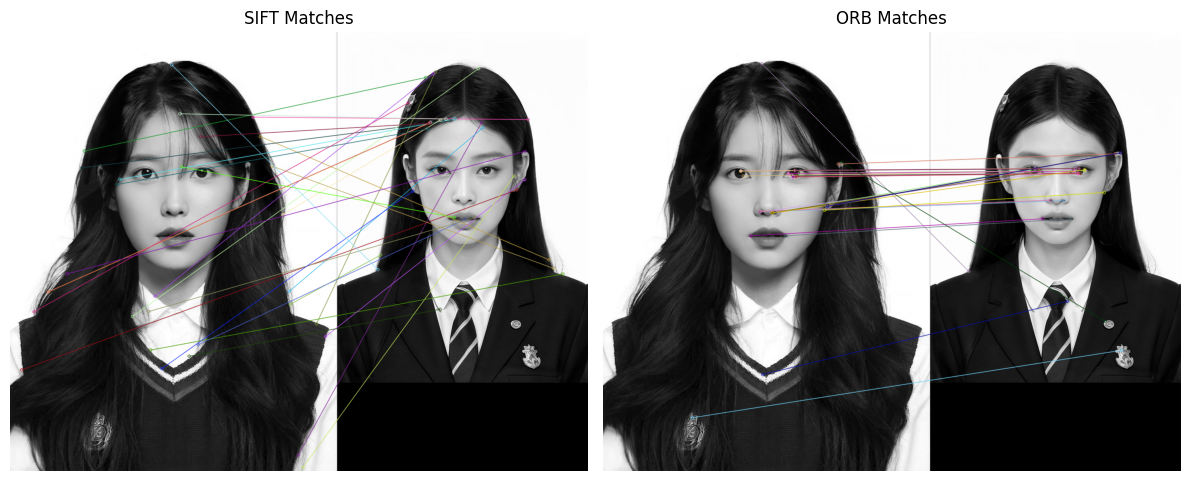

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_sift_matches)
plt.title('SIFT Matches')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_orb_matches)
plt.title('ORB Matches')
plt.axis('off')

plt.tight_layout()
plt.show()

# Module 2.0: Feature Extraction and Object Detection

Step 1: Load Images
• Load two images of your choice that depict the same scene or object but from different angles.

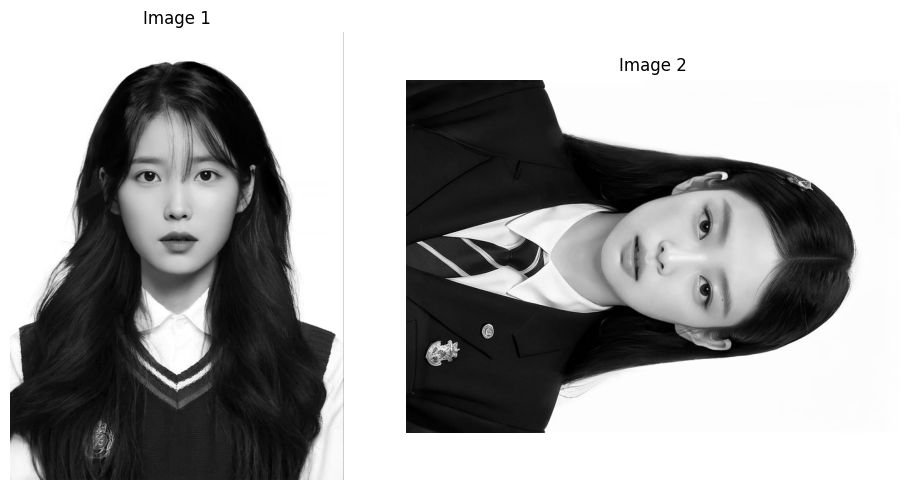

In [19]:
import cv2
import matplotlib.pyplot as plt

# Load two images that depict the same scene or object from different angles
image1 = cv2.imread(IMAGE1_PATH, 0)  # Load the first image in grayscale
src = cv2.imread(IMAGE2_PATH, 0)  # Load the second image in grayscale
image2 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
# Check if images are loaded correctly

plt.figure(figsize=(10, 5))

# Show first image
plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')
plt.axis('off')

# Show second image
plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()


Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB (30 points)
* Apply the SIFT algorithm to detect keypoints and compute descriptors for both images.
* Apply the SURF algorithm to do the same.
* Finally, apply ORB to extract keypoints and descriptors.

In [20]:
sift = cv2.SIFT_create()
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(image1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(image2, None)

surf = cv2.xfeatures2d.SURF_create()
keypoints1_surf, descriptors1_surf = surf.detectAndCompute(image1, None)
keypoints2_surf, descriptors2_surf = surf.detectAndCompute(image2, None)

orb = cv2.ORB_create()
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(image1, None)
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(image2, None)


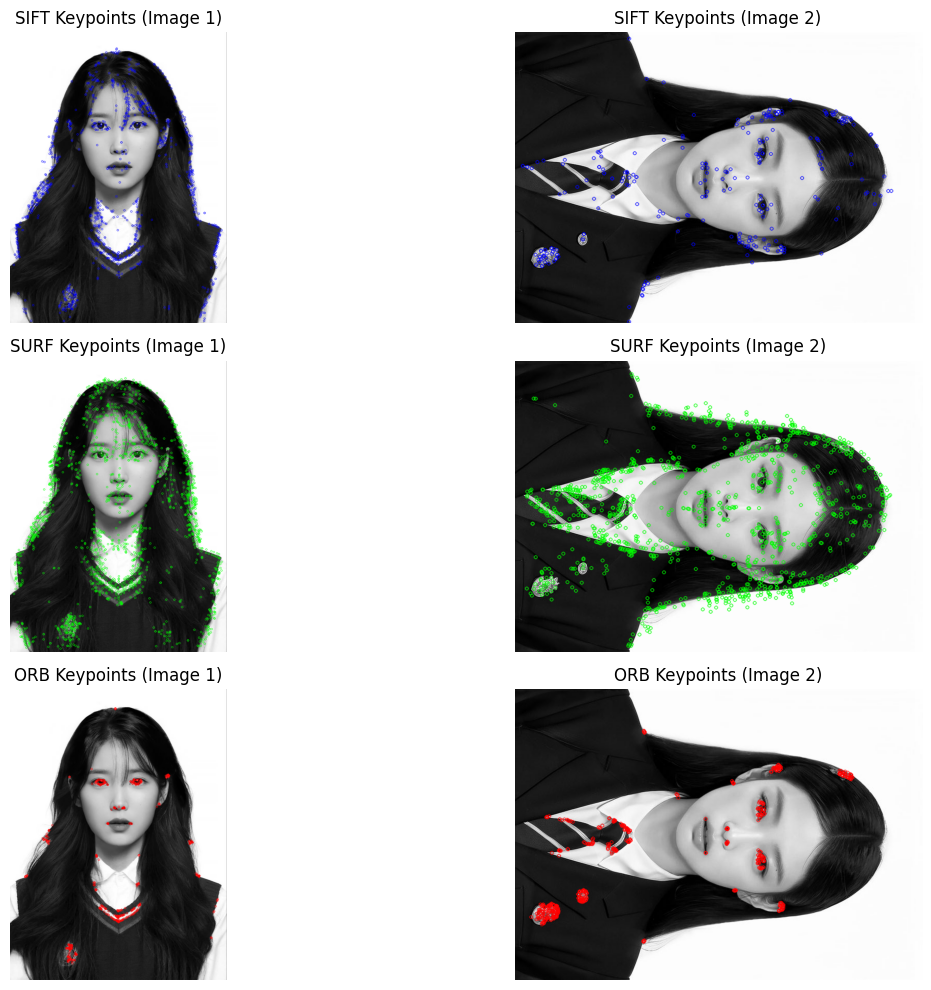

In [21]:
image1_sift_keypoints = cv2.drawKeypoints(image1, keypoints1_sift, None, color=(255, 0, 0))
image2_sift_keypoints = cv2.drawKeypoints(image2, keypoints2_sift, None, color=(255, 0, 0))

image1_surf_keypoints = cv2.drawKeypoints(image1, keypoints1_surf, None, color=(0, 255, 0))
image2_surf_keypoints = cv2.drawKeypoints(image2, keypoints2_surf, None, color=(0, 255, 0))

image1_orb_keypoints = cv2.drawKeypoints(image1, keypoints1_orb, None, color=(0, 0, 255))
image2_orb_keypoints = cv2.drawKeypoints(image2, keypoints2_orb, None, color=(0, 0, 255))

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(image1_sift_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints (Image 1)')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(image2_sift_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints (Image 2)')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(image1_surf_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints (Image 1)')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(image2_surf_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Keypoints (Image 2)')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(image1_orb_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints (Image 1)')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(cv2.cvtColor(image2_orb_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints (Image 2)')
plt.axis('off')

plt.tight_layout()
plt.show()

Step 3: Feature Matching with Brute-Force and FLANN

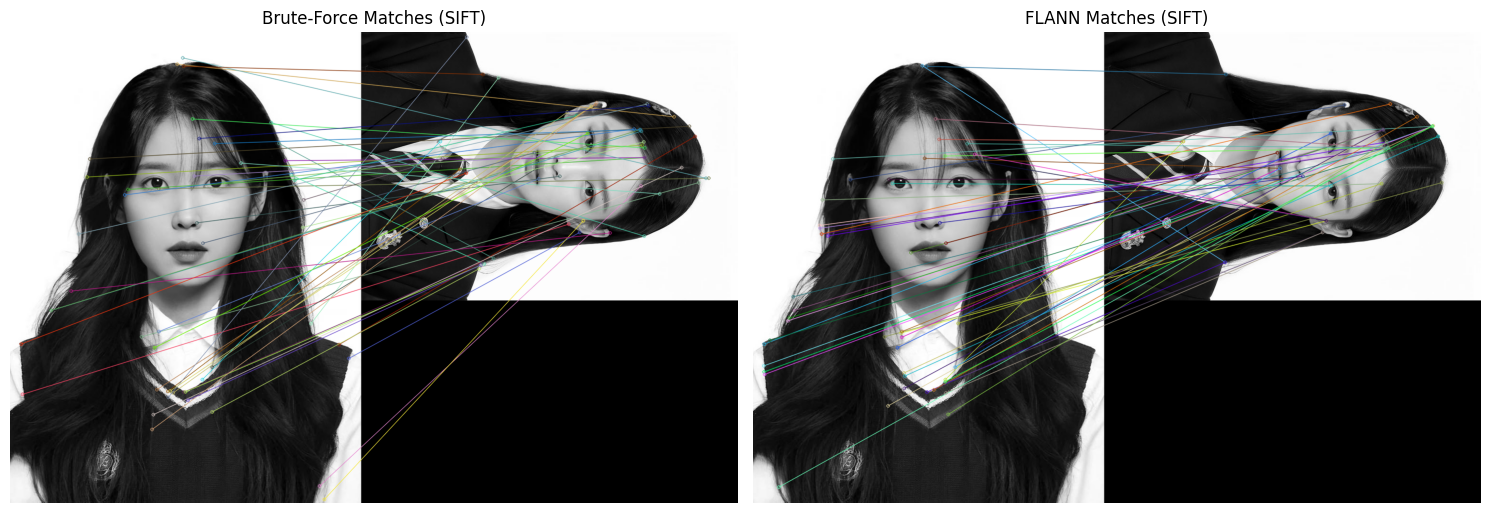

In [22]:
# Brute-Force Matcher with SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # NORM_L2 for SIFT and crossCheck for more accuracy
matches_bf = bf.match(descriptors1_sift, descriptors2_sift)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)  # Sort by distance

# FLANN Matcher with SIFT
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Specifies how many times the tree will be recursively traversed

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1_sift, descriptors2_sift, k=2)

# Apply ratio test for FLANN matching (Lowe's ratio test)
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.7 * n.distance:
        good_matches_flann.append(m)

# Draw the matches for Brute-Force
image_bf_matches = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the matches for FLANN
image_flann_matches = cv2.drawMatches(image1, keypoints1_sift, image2, keypoints2_sift, good_matches_flann[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize=(15, 10))

# Brute-Force Matches
plt.subplot(1, 2, 1)
plt.imshow(image_bf_matches)
plt.title('Brute-Force Matches (SIFT)')
plt.axis('off')

# FLANN Matches
plt.subplot(1, 2, 2)
plt.imshow(image_flann_matches)
plt.title('FLANN Matches (SIFT)')
plt.axis('off')

plt.tight_layout()
plt.show()

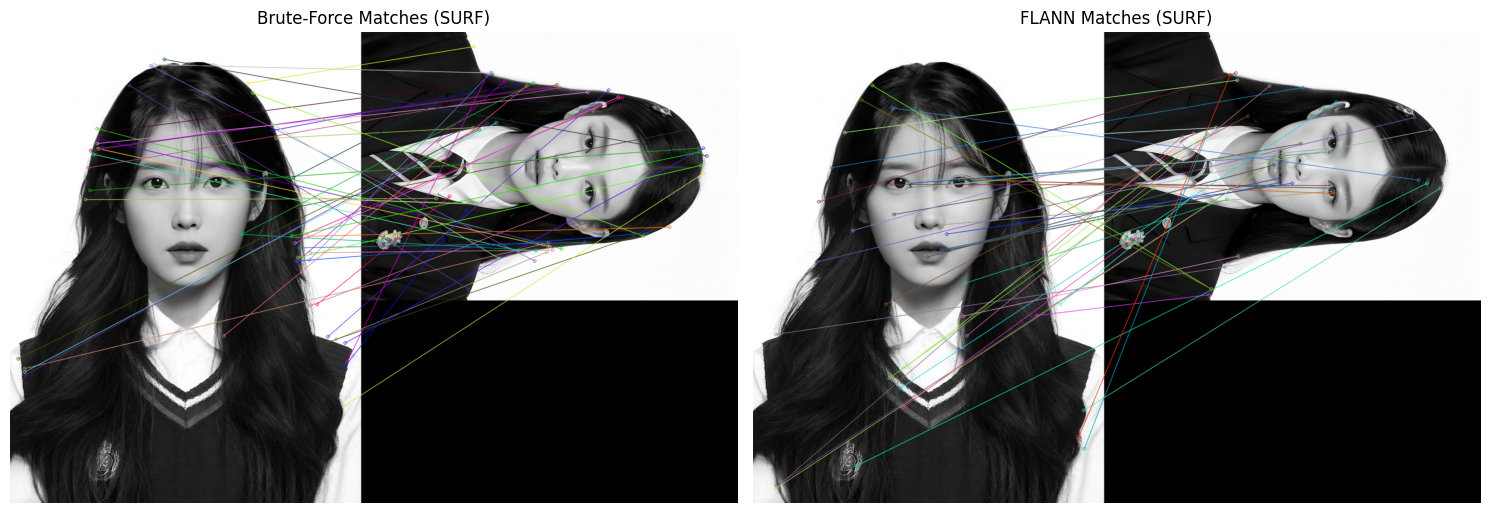

In [23]:
# Brute-Force Matcher with SIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)  # NORM_L2 for SIFT and crossCheck for more accuracy
matches_bf = bf.match(descriptors1_surf, descriptors2_surf)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)  # Sort by distance

# FLANN Matcher with SIFT
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Specifies how many times the tree will be recursively traversed

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1_surf, descriptors2_surf, k=2)

# Apply ratio test for FLANN matching (Lowe's ratio test)
good_matches_flann = []
for m, n in matches_flann:
    if m.distance < 0.7 * n.distance:
        good_matches_flann.append(m)

# Draw the matches for Brute-Force
image_bf_matches = cv2.drawMatches(image1, keypoints1_surf, image2, keypoints2_surf, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the matches for FLANN
image_flann_matches = cv2.drawMatches(image1, keypoints1_surf, image2, keypoints2_surf, good_matches_flann[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize=(15, 10))

# Brute-Force Matches
plt.subplot(1, 2, 1)
plt.imshow(image_bf_matches)
plt.title('Brute-Force Matches (SURF)')
plt.axis('off')

# FLANN Matches
plt.subplot(1, 2, 2)
plt.imshow(image_flann_matches)
plt.title('FLANN Matches (SURF)')
plt.axis('off')

plt.tight_layout()
plt.show()

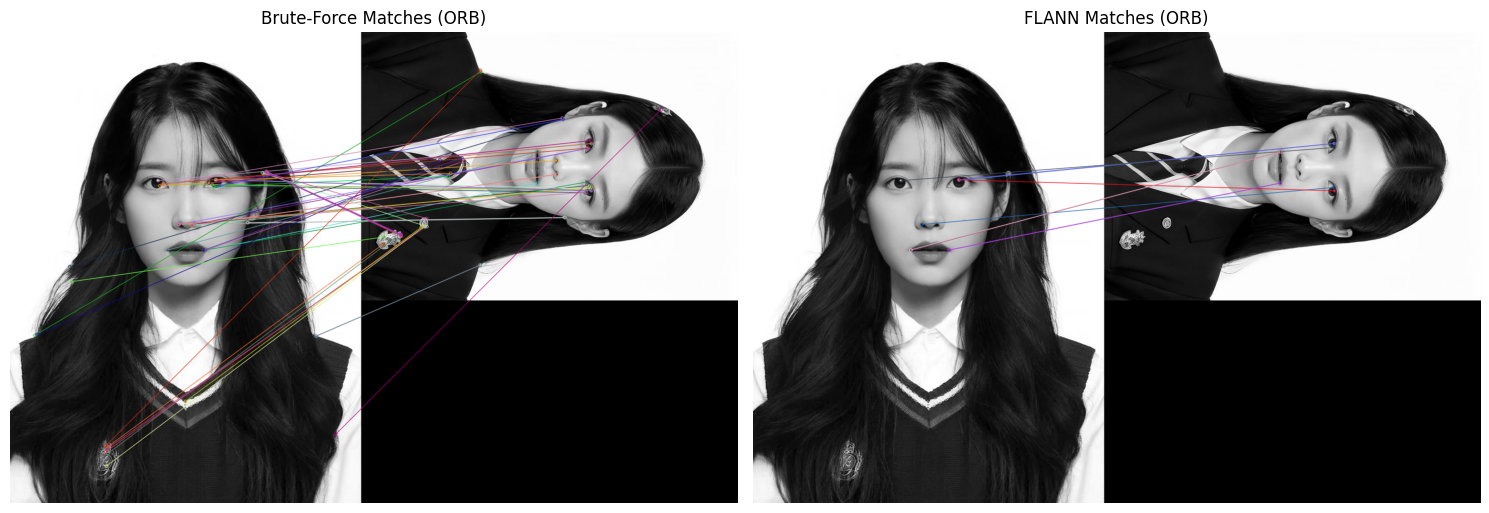

In [24]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_bf = bf.match(descriptors1_orb, descriptors2_orb)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)

FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = flann.knnMatch(descriptors1_orb, descriptors2_orb, k=2)

good_matches_flann = []
for match in matches_flann:
    if len(match) == 2:
        m, n = match
        if m.distance < 0.7 * n.distance:
            good_matches_flann.append(m)

image_bf_matches = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, matches_bf[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

image_flann_matches = cv2.drawMatches(image1, keypoints1_orb, image2, keypoints2_orb, good_matches_flann[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_bf_matches)
plt.title('Brute-Force Matches (ORB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_flann_matches)
plt.title('FLANN Matches (ORB)')
plt.axis('off')

plt.tight_layout()
plt.show()

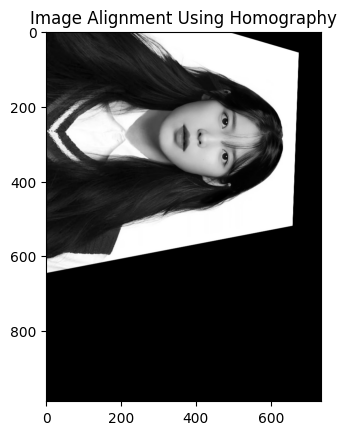

In [28]:
src_pts = np.float32(
    [keypoints1_orb[m.queryIdx].pt for m in good_matches_flann]
).reshape(-1,1,2)
dst_pts = np.float32(
    [keypoints2_orb[m.trainIdx].pt for m in good_matches_flann]
).reshape(-1,1,2)

M, masl = cv2.findHomography(src_pts,dst_pts, cv2.RANSAC,5.0)

h,w = image1.shape

result = cv2.warpPerspective(image1, M, (w,h))

plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.title("Image Alignment Using Homography")
plt.show()